In [21]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [22]:
data = np.loadtxt('data2.txt', delimiter=',')
X_train = data[:,[0,1]] #feature set
y_train = data[:,2] #label set
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]

In [23]:
def PCA(X_train, k):
    # 1. Computation of Averaging Co-Variance Matrix:
    cov = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i in range(0, X_train.shape[0]):
        cov = cov + np.matmul(X_train[0].transpose(), X_train[0])
    avg_cov = (1/X_train.shape[0]) * cov
    # 2. Obtaining the eigen vectors:
    from numpy import linalg as LA
    eigen_values, eigen_vectors = LA.eig(avg_cov)
    # 3. Selecting k (here 1) Eigen Vector(s) and new feature space:
    z = np.matmul(eigen_vectors.T[0:k], X_train.T)
    return z
z = PCA(X_train, 1) # Calling the PCA function

In [24]:
# 1. Re-scaling or Dennormalization:
for i in range(0, X_train.shape[1]):
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = X_train[j][i] * std[i] + mean[i]
# 2. Plotting the 3-D Data (extra dimension for target):

sequence_containing_x_vals = list(X_train.transpose()[0])
sequence_containing_y_vals = list(X_train.transpose()[1])
sequence_containing_z_vals = list(y_train)
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Actual Housing Price')

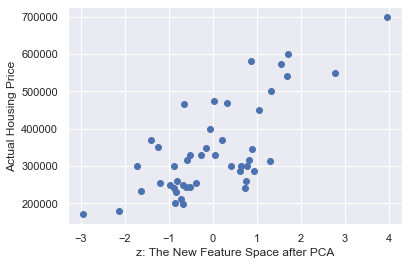

In [25]:
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Actual Housing Price', fontsize=10)
# 3. Plotting the PCA new 2-D Data (extra dimension for target):
plt.scatter(z.T, y_train)
plt.xlabel('z: The New Feature Space after PCA')
plt.ylabel('Actual Housing Price')